<a href="https://colab.research.google.com/github/meichenfang/explicit-trajectory/blob/main/find-order.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Denote the gene expression matrix by $X_{ij}$ where j is gene index and i is cell index. In summary, we assume a specific model of transcription and want to solve**

\begin{align}
    &\text{argmax}_{\tau} \, \text{argmax}_{t_i}  \,  \text{argmax}_{\theta_j} \sum_{j} \sum_i \ln P(\mathcal{X}_{ij},t_i; \theta_j,\tau).
\end{align}



#

## Inference of θ given t

First, we want is to infer parameters given $t_i$. 

We first reparameterize y
\begin{align}
  \begin{split}
        y(t) &= a + b e^{-\beta t}\\
         \ln P(x_{i},t_i; \theta) & \sim x_{i} \ln \left(a + b e^{-\beta t_i}\right) -  a - b e^{-\beta t_i}\\
         \mathcal{L} (\theta) &=\sum_i \ln P(x_i,t_i,\theta) =  \sum_i x_{i} \ln \left(a + b e^{-\beta t_i}\right) -   \sum_i\left[a+ b e^{-\beta t_i}\right]\\
    \end{split}
\end{align}



## Inference of t given θ

We use Monte Carlo method to determine the order of cells.

# Simulated annealing implementation 

## Test

### Generate data

In [ ]:
#%% generate data
np.random.seed(2022)
n = 5000
p = 10
a0 = np.random.uniform(1,10,size=p)
a1 = np.random.uniform(1,10,size=p)
a2 = np.random.uniform(1,10,size=p)
beta = np.random.uniform(1,10,size=p)
gamma = 1

t = np.linspace(0, 1, n)

Tau=[0,0.5]
tau=(0,0.5,1)

K=2
theta=np.zeros((p,K+2))
theta[:,0]=a0
theta[:,1]=a1
theta[:,2]=a2
theta[:,-1]=beta

%time Y = get_y(theta,t,tau)

X = np.random.poisson(Y)

CPU times: user 14.2 ms, sys: 41 µs, total: 14.2 ms
Wall time: 16 ms


In [ ]:
%time y_ = get_y(theta,t,tau)

CPU times: user 19.6 ms, sys: 304 µs, total: 19.9 ms
Wall time: 22.1 ms


In [ ]:
ts = time.time()
y = np.zeros((n,p,2))
for j in range(p):
  for i in range(n):
    y[i,j,:]=eval_x([a1[j],a2[j]],Tau,t[i],beta[j],gamma,x0=[a0[j],a0[j]])
print(time.time()-ts)

2.422729730606079


In [ ]:
x = np.random.poisson(y)
X=x[:,:,0]
Y=y[:,:,0]

### Test infer_theta

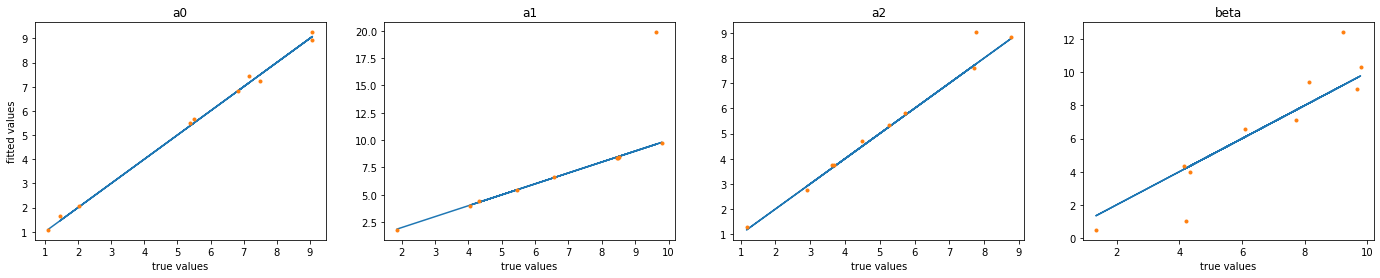

In [ ]:
#%% infer theta
theta_hat=infer_theta(X, t, tau=(0,0.5,1))

K=len(tau)-1
fig, ax = plt.subplots(1,K+2,figsize=(6*(K+2),4))

ax[0].plot(a0.flatten(),a0.flatten());
ax[0].plot(a0.flatten(),theta_hat[:,0],'.');
ax[0].set_title("a0")
ax[0].set_ylabel("fitted values")
ax[0].set_xlabel("true values")

ax[1].plot(a1.flatten(),a1.flatten());
ax[1].plot(a1.flatten(),theta_hat[:,1],'.');
ax[1].set_title("a1")
ax[1].set_xlabel("true values")

ax[2].plot(a2.flatten(),a2.flatten());
ax[2].plot(a2.flatten(),theta_hat[:,2],'.');
ax[2].set_title("a2")
ax[2].set_xlabel("true values")

ax[-1].plot(beta.flatten(),beta.flatten());
ax[-1].plot(beta.flatten(),theta_hat[:,-1],'.');
ax[-1].set_title("beta");
ax[-1].set_xlabel("true values");


### Test infer_T

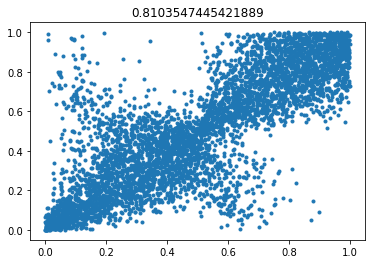

In [ ]:
tau=(0,0.5,1)
K=2
n,p=np.shape(X)
theta=np.zeros((p,K+2))
theta[:,0]=a0
theta[:,1]=a1
theta[:,2]=a2
theta[:,-1]=beta

pi=infer_t(X,theta,tau=(0,0.5,1),iters=n*10)
plt.plot(pi,t,'.');
plt.title(str((np.mean(t*pi)-0.25)/(np.mean(t**2)-0.25)));

### Test infer_

In [ ]:
#%%
Epoch = 10
corr=np.zeros(Epoch)
theta = np.ones((p,K+2))
theta[:,0:(K+1)]=np.mean(X,axis=0)[:,None]
pi=np.random.permutation(n)/(n-1)
for k in range(Epoch):
  theta=infer_theta(X,pi,tau,theta)
  pi=infer_t(X,theta,tau,t0=pi,iters=n*10)
  corr[k]=np.corrcoef(t,pi)[0,1]
plt.plot(corr);

KeyboardInterrupt: ignored

In [ ]:
plt.plot(pi,t,'.');

In [ ]:
K=len(tau)-1
theta_hat = theta

fig, ax = plt.subplots(1,K+2,figsize=(6*(K+2),4))

ax[0].plot(a0.flatten(),a0.flatten());
ax[0].plot(a0.flatten(),theta_hat[:,0],'.');
ax[0].set_title("a0")
ax[0].set_ylabel("fitted values")
ax[0].set_xlabel("true values")

ax[1].plot(a1.flatten(),a1.flatten());
ax[1].plot(a1.flatten(),theta_hat[:,1],'.');
ax[1].set_title("a1")
ax[1].set_xlabel("true values")

ax[2].plot(a2.flatten(),a2.flatten());
ax[2].plot(a2.flatten(),theta_hat[:,2],'.');
ax[2].set_title("a2")
ax[2].set_xlabel("true values")

ax[-1].plot(beta.flatten(),beta.flatten());
ax[-1].plot(beta.flatten(),theta_hat[:,-1],'.');
ax[-1].set_title("beta");
ax[-1].set_xlabel("true values");

In [ ]:
y_hat = get_y(theta, pi, tau)
fig, ax = plt.subplots(p,2,figsize=(12,4*p))
for i in range(p):
  ax[i,0].plot(pi,X[:,i],'.');
  ax[i,0].plot(pi,y_hat[:,i],'r.');
  ax[i,1].plot(t,X[:,i],'.');
  ax[i,1].plot(t,Y[:,i],'r.');

#### 10 + 90 null

In [ ]:
np.random.seed(2022)
n = 2000
p = 100
a = np.random.uniform(1,10,size=p).reshape(1,-1)
b = np.random.uniform(1,10,size=p).reshape(1,-1)
b[0,10:]=0
beta = np.random.uniform(1,10,size=p).reshape(1,-1)

t = np.linspace(0, 1, n).reshape(-1,1)
y = a + b * np.exp(-t@beta)

X = np.random.poisson(y)
np.shape(X)

In [ ]:
# initialization
theta=np.ones(shape=(p,3))
theta[:,0]=np.mean(X,axis=0)-1

# Epoch
Epoch = 15
tau=np.zeros(Epoch)
for k in range(Epoch):
  pi=infer_t(X,theta,iters=2000+k*2000)
  theta=infer_theta(X,pi,theta)
  tau[k]=np.corrcoef(np.squeeze(t),pi)[0,1]

plt.plot(tau);

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(18,4))
ax[0].plot(a[0],theta[:,0],'.');
ax[0].plot([0,10],[0,10]);
ax[1].plot(b[0],theta[:,1],'.');
ax[1].plot([0,10],[0,10]);
ax[2].plot(beta[0],theta[:,2],'.');
ax[2].plot([0,10],[0,10]);

In [ ]:
id=theta[:,2]>1000
plt.plot(X[:,id],'.');
plt.plot(pi,theta[id,0]+theta[id,1]*np.exp(theta[id,2]*pi),'.')
print(theta[id,:])
print(a[0,id],b[0,id],beta[0,id])

# EM implementation

## Test

In [ ]:
#%% generate data
np.random.seed(2022)
n = 1500
p = 10
a0 = np.random.uniform(1,10,size=p)
a1 = np.random.uniform(1,10,size=p)
a2 = np.random.uniform(1,10,size=p)
beta = np.random.uniform(1,5,size=p)
gamma = np.random.uniform(1,5,size=p)

t = np.linspace(0, 1, n)

Tau=[0,0.5]
tau=(0,0.5,1)

K=2
theta=np.zeros((p,K+4))
theta[:,0]=a1
theta[:,1]=a2
theta[:,-3]=a0
theta[:,-4]=a0
theta[:,-1]=gamma
theta[:,-2]=beta

%time Y = get_Y(theta,t,tau)

X = np.random.poisson(Y)

CPU times: user 10.5 ms, sys: 0 ns, total: 10.5 ms
Wall time: 10.5 ms


In [ ]:
ts = time.time()
y = np.zeros((n,p,2))
for j in range(p):
  for i in range(n):
    y[i,j,:]=eval_x([a1[j],a2[j]],Tau,t[i],beta[j],gamma[j],x0=[a0[j],a0[j]])
print(time.time()-ts)

0.800513505935669


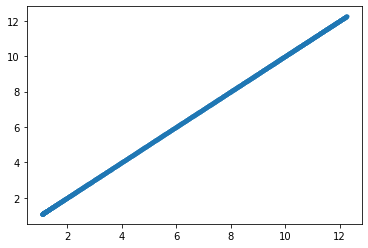

In [ ]:
plt.plot(Y[:,0,1],y[:,0,1],'.');

In [ ]:
np.sum(Y-y)/n/p/2

1.3554971973291887e-05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in subtract


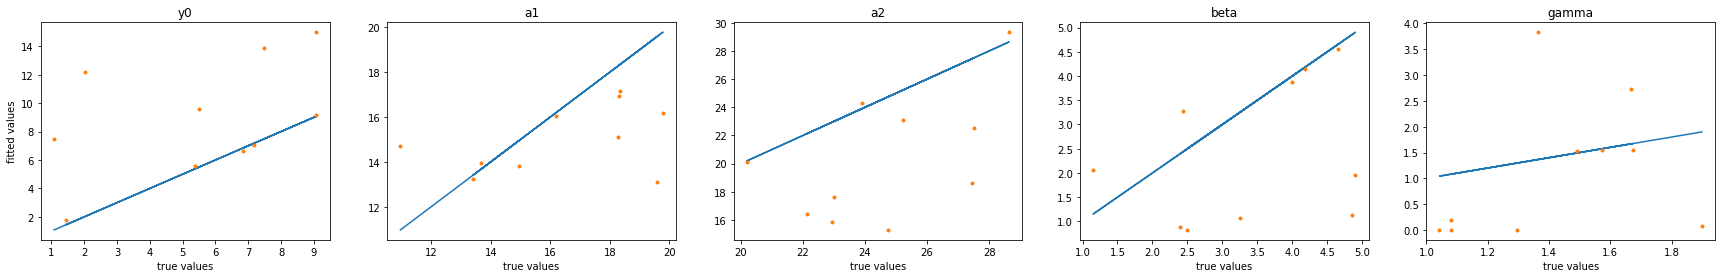

In [ ]:
#%% infer theta
weight=np.diag(v=[1]*n)
theta_hat=update_theta(X,weight,tau,parallel=True,n_threads=2,theta0=None)

K=len(tau)-1
fig, ax = plt.subplots(1,K+3,figsize=(6*(K+3),4))

ax[0].plot(a0.flatten(),a0.flatten());
ax[0].plot(a0.flatten(),theta_hat[:,-3],'.');
ax[0].set_title("y0")
ax[0].set_ylabel("fitted values")
ax[0].set_xlabel("true values")

ax[1].plot(a1.flatten(),a1.flatten());
ax[1].plot(a1.flatten(),theta_hat[:,0],'.');
ax[1].set_title("a1")
ax[1].set_xlabel("true values")

ax[2].plot(a2.flatten(),a2.flatten());
ax[2].plot(a2.flatten(),theta_hat[:,1],'.');
ax[2].set_title("a2")
ax[2].set_xlabel("true values")

ax[-2].plot(beta.flatten(),beta.flatten());
ax[-2].plot(beta.flatten(),theta_hat[:,-2],'.');
ax[-2].set_title("beta");
ax[-2].set_xlabel("true values");

ax[-1].plot(gamma.flatten(),gamma.flatten());
ax[-1].plot(gamma.flatten(),theta_hat[:,-1],'.');
ax[-1].set_title("gamma");
ax[-1].set_xlabel("true values");


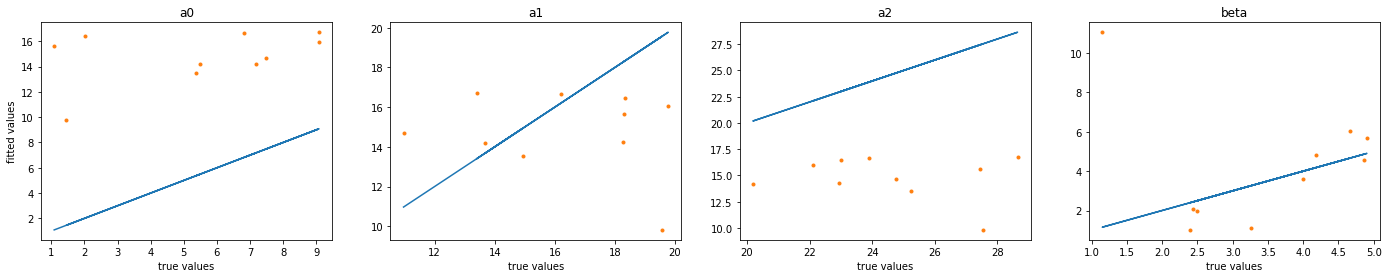

In [ ]:
#%% infer theta
m=1001
weight=np.ones((n,m))/m
theta_hat=update_theta(X,weight,tau,theta0=None)

K=len(tau)-1
fig, ax = plt.subplots(1,K+2,figsize=(6*(K+2),4))

ax[0].plot(a0.flatten(),a0.flatten());
ax[0].plot(a0.flatten(),theta_hat[:,0],'.');
ax[0].set_title("a0")
ax[0].set_ylabel("fitted values")
ax[0].set_xlabel("true values")

ax[1].plot(a1.flatten(),a1.flatten());
ax[1].plot(a1.flatten(),theta_hat[:,1],'.');
ax[1].set_title("a1")
ax[1].set_xlabel("true values")

ax[2].plot(a2.flatten(),a2.flatten());
ax[2].plot(a2.flatten(),theta_hat[:,2],'.');
ax[2].set_title("a2")
ax[2].set_xlabel("true values")

ax[-1].plot(beta.flatten(),beta.flatten());
ax[-1].plot(beta.flatten(),theta_hat[:,-1],'.');
ax[-1].set_title("beta");
ax[-1].set_xlabel("true values");

In [ ]:
weight = update_weight(X,theta,tau,m)

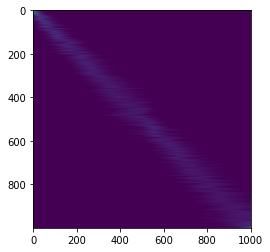

In [ ]:
plt.imshow(weight);

### traj_EM

In [ ]:
theta_hat, weight = traj_EM(X, tau, m=101, epoch=10, parallel = True, n_threads = 2)

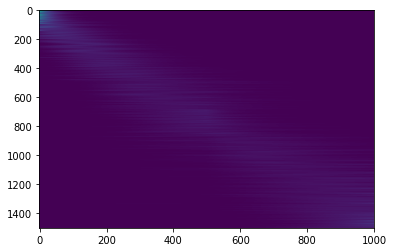

In [ ]:
plt.imshow(weight,aspect="auto");

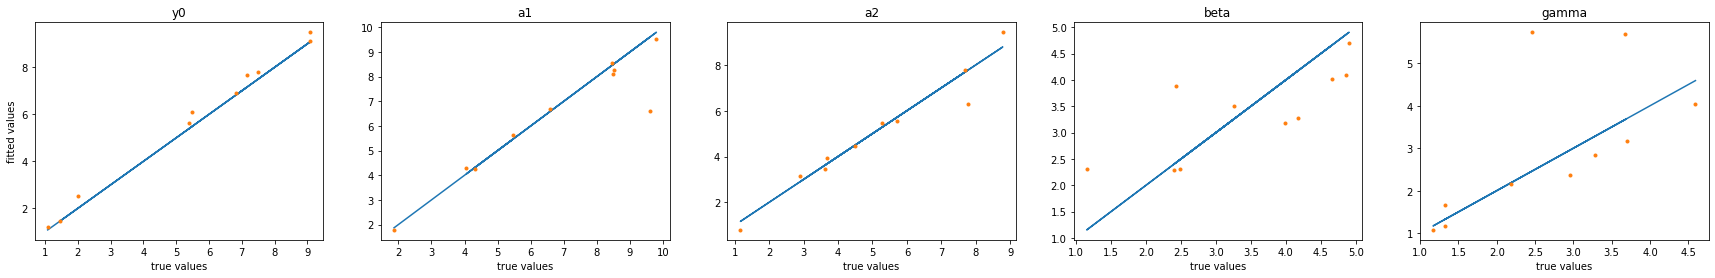

In [ ]:
K=len(tau)-1
fig, ax = plt.subplots(1,K+3,figsize=(6*(K+3),4))

ax[0].plot(a0.flatten(),a0.flatten());
ax[0].plot(a0.flatten(),theta_hat[:,-3],'.');
ax[0].set_title("y0")
ax[0].set_ylabel("fitted values")
ax[0].set_xlabel("true values")

ax[1].plot(a1.flatten(),a1.flatten());
ax[1].plot(a1.flatten(),theta_hat[:,0],'.');
ax[1].set_title("a1")
ax[1].set_xlabel("true values")

ax[2].plot(a2.flatten(),a2.flatten());
ax[2].plot(a2.flatten(),theta_hat[:,1],'.');
ax[2].set_title("a2")
ax[2].set_xlabel("true values")

ax[-2].plot(beta.flatten(),beta.flatten());
ax[-2].plot(beta.flatten(),theta_hat[:,-2],'.');
ax[-2].set_title("beta");
ax[-2].set_xlabel("true values");

ax[-1].plot(gamma.flatten(),gamma.flatten());
ax[-1].plot(gamma.flatten(),theta_hat[:,-1],'.');
ax[-1].set_title("gamma");
ax[-1].set_xlabel("true values");

# Real data

In [ ]:
!pip install -U scvelo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 196 kB 4.4 MB/s 
     |████████████████████████████████| 88 kB 7.4 MB/s 
     |████████████████████████████████| 2.0 MB 48.1 MB/s 
     |████████████████████████████████| 11.2 MB 39.4 MB/s 
     |████████████████████████████████| 4.8 MB 21.9 MB/s 
     |████████████████████████████████| 96 kB 5.0 MB/s 
     |████████████████████████████████| 930 kB 41.2 MB/s 
     |████████████████████████████████| 1.1 MB 64.8 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52040 sha256=8f8863a86a4183a609b863c038314181be58a8a3feb83d12721724772d37c1c0
  Stored in directory: /root/.cache/pip/wheels/48/36/9f/eb3377d4a7423b96105b6667d36c3faa49ee73b96d8cab80b3
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=82384ac2a9c6b10a01fbbb636663cda4766

In [ ]:
import scvelo as scv

adata = scv.datasets.forebrain()
adata

  0%|          | 0.00/29.2M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 1720 × 32738
    obs: 'Clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [ ]:
adata.var_names

Index(['FAM138A', 'RP11-34P13.7', 'RP11-34P13.8', 'AL627309.1',
       'RP11-34P13.14', 'AP006222.2', 'RP4-669L17.2', 'RP5-857K21.1',
       'RP5-857K21.3', 'RP5-857K21.4',
       ...
       'BPY2', 'DAZ2', 'AC016752.1', 'TTTY17B', 'TTTY4B', 'BPY2B', 'DAZ4',
       'CSPG4P1Y', 'CDY1', 'TTTY3'],
      dtype='object', name='Gene', length=32738)

## Inference with only marker genes

In [ ]:
genes=["SOX2","SLC17A7","EOMES","CLU","FBXO32",
       "UNC5D","SEZ6","RBFOX1","DCX","GRIA3",
       "STMN2", "FAM64A","ELAVL4","RNASEH2B"]
idx=adata.var_names.isin(genes)
gene_list=adata.var_names[idx]
u=adata.layers["unspliced"][:,idx].toarray()
s=adata.layers["spliced"][:,idx].toarray()
n,p=np.shape(s)
X = np.zeros((n,p,2))
X[:,:,0]=u
X[:,:,1]=s

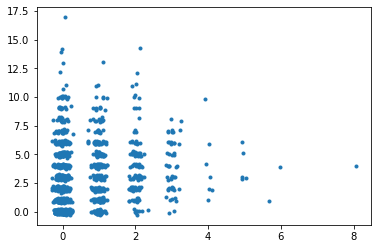

In [ ]:
j=0
plt.plot(X[:,j,0]+np.random.normal(scale=0.1,size=n),X[:,j,1]+np.random.normal(scale=0.1,size=n),'.');

### One state

In [ ]:
theta_hat_1, weight_1 = traj_EM(X,tau=(0,1),parallel=True,n_threads=2)

In [ ]:
t=np.linspace(0,1,101)
pi=np.sum(weight_1 * t, axis=1)

In [ ]:
ord = np.argsort(pi)

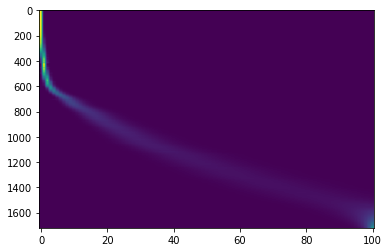

In [ ]:
plt.imshow(weight_1[ord,:],aspect="auto");

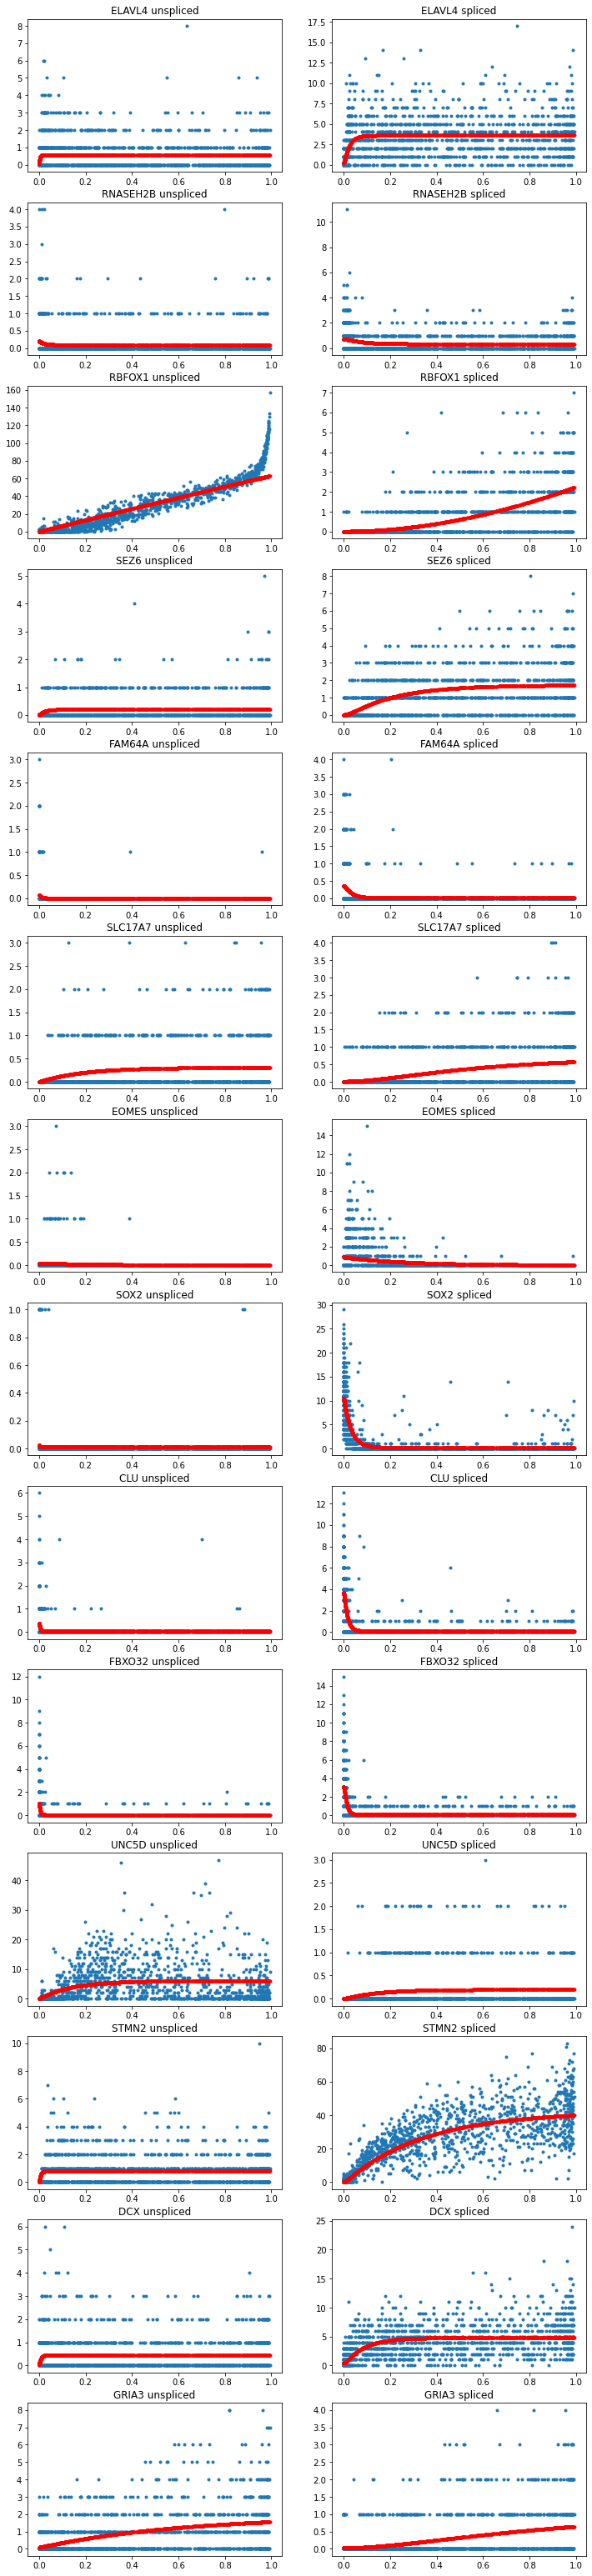

In [ ]:
y_hat = get_Y(theta_hat_1, pi, tau=(0,1))
fig, ax = plt.subplots(p,2,figsize=(12,4*p))
for i in range(p):
  ax[i,0].plot(pi,X[:,i,0],'.');
  ax[i,0].plot(pi,y_hat[:,i,0],'r.');
  ax[i,0].set_title(gene_list[i]+" unspliced")

  ax[i,1].plot(pi,X[:,i,1],'.');
  ax[i,1].plot(pi,y_hat[:,i,1],'r.');
  ax[i,1].set_title(gene_list[i]+" spliced")

#### Check cell size

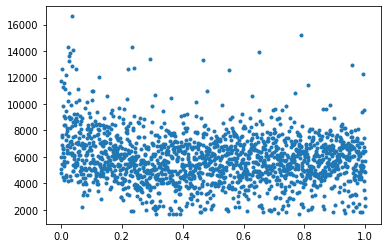

In [ ]:
plt.plot(pi,np.sum(adata.layers["spliced"],axis=1),'.');

### Two states

In [ ]:
theta_hat, weight = traj_EM(X,tau=(0,0.3,1),parallel=True,n_threads=2)

In [ ]:
t=np.linspace(0,1,101)
pi=np.sum(weight * t, axis=1)

In [ ]:
ord = np.argsort(pi)

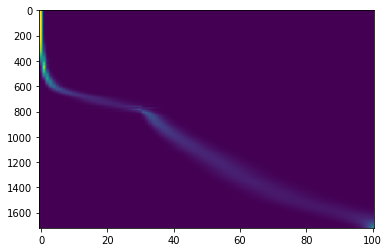

In [ ]:
plt.imshow(weight[ord,:],aspect="auto");

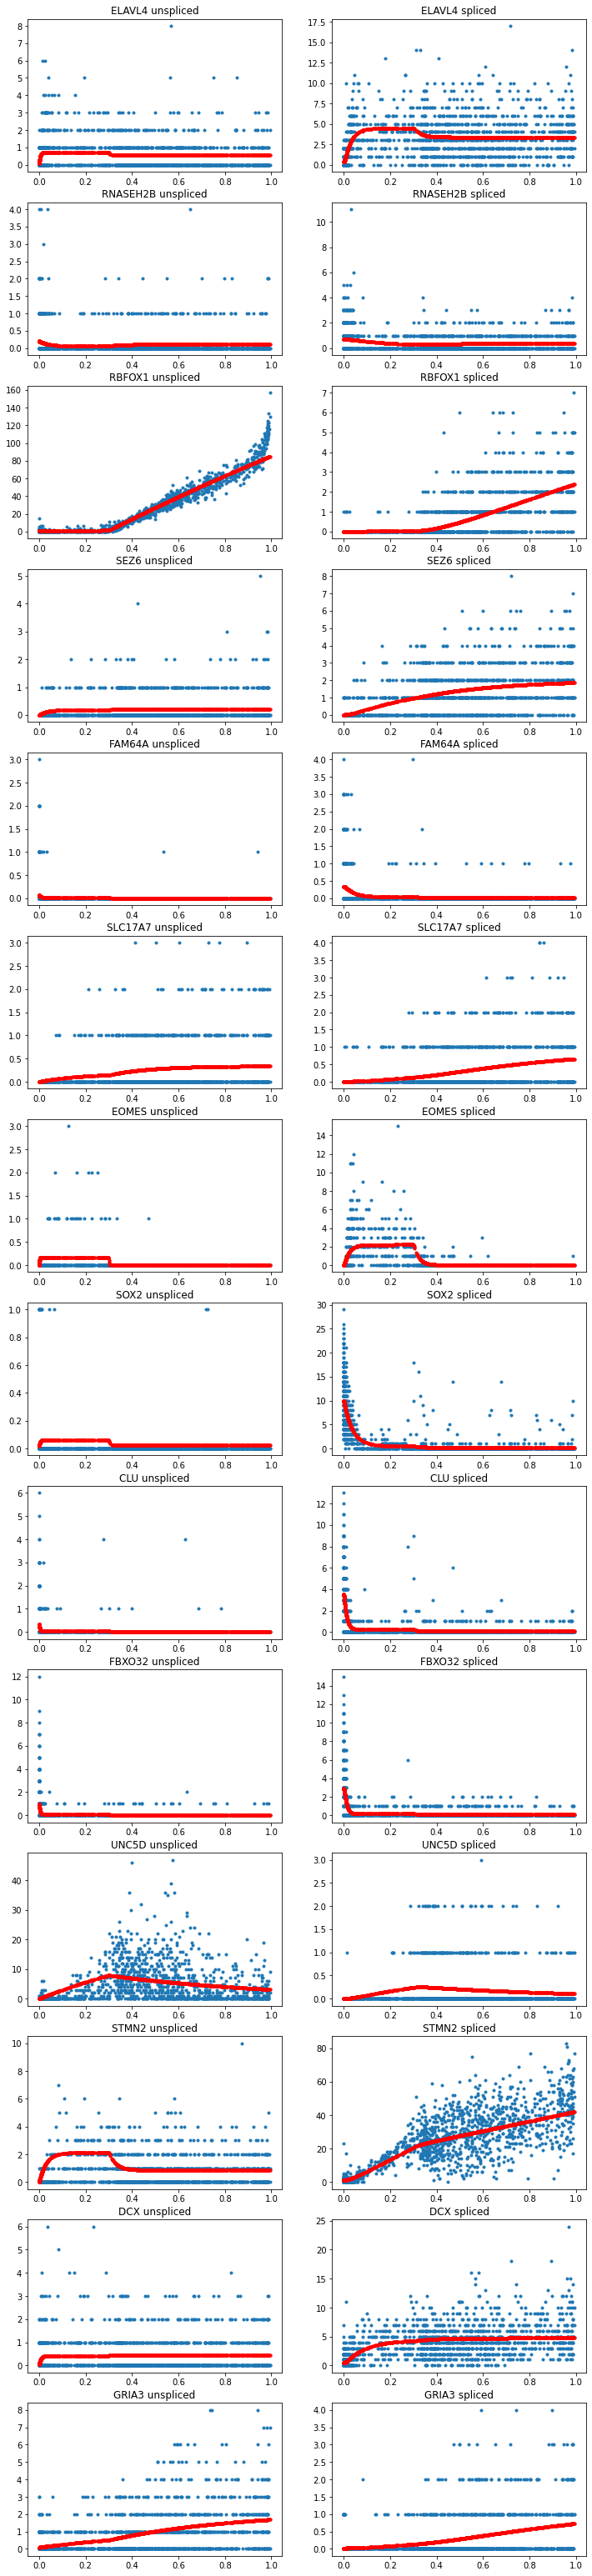

In [ ]:
y_hat = get_Y(theta_hat, pi, tau=(0,0.3,1))
fig, ax = plt.subplots(p,2,figsize=(12,4*p))
for i in range(p):
  ax[i,0].plot(pi,X[:,i,0],'.');
  ax[i,0].plot(pi,y_hat[:,i,0],'r.');
  ax[i,0].set_title(gene_list[i]+" unspliced")

  ax[i,1].plot(pi,X[:,i,1],'.');
  ax[i,1].plot(pi,y_hat[:,i,1],'r.');
  ax[i,1].set_title(gene_list[i]+" spliced")

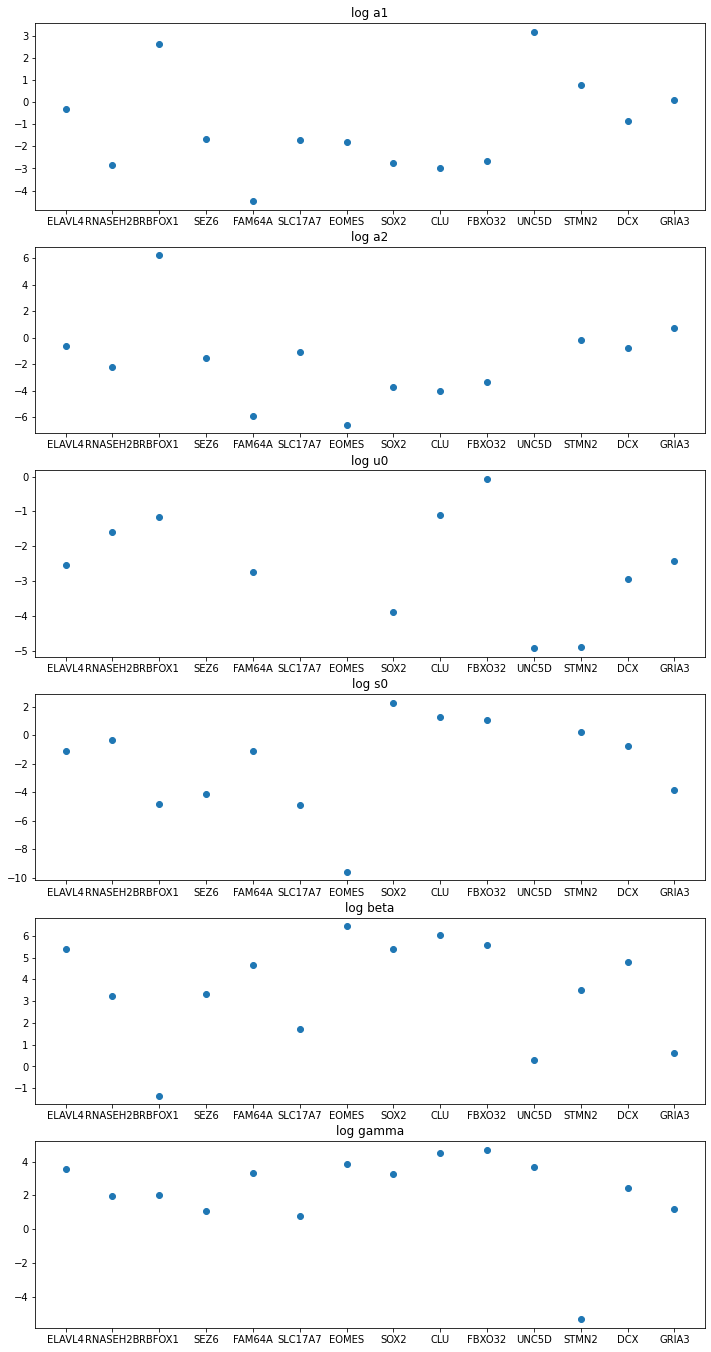

In [ ]:
K=2
fig, ax = plt.subplots(K+4,1,figsize=(12,4*(K+4)))

for i in range(K+4):
  ax[i].scatter(np.array(gene_list), np.log(theta_hat[:,i]));

ax[0].set_title("log a1");
ax[1].set_title("log a2");
ax[2].set_title("log u0");
ax[3].set_title("log s0");
ax[4].set_title("log beta");
ax[5].set_title("log gamma");



Text(0, 0.5, 's0')

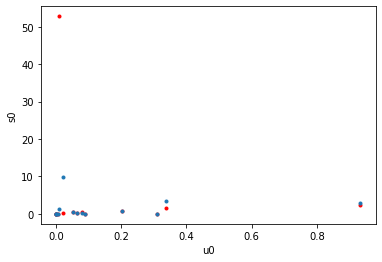

In [ ]:
plt.plot(theta_hat[:,-4],theta_hat[:,-4]*theta_hat[:,-2]/theta_hat[:,-1],'r.');
plt.plot(theta_hat[:,-4], theta_hat[:,-3],'.');
plt.xlabel("u0")
plt.ylabel("s0")

#### Check cell size

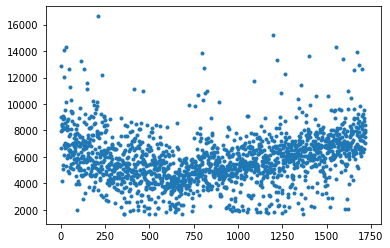

In [ ]:
plt.plot(np.sum(adata.layers["spliced"],axis=1)[ord],'.');

### Two states

In [ ]:
theta_hat, weight = traj_EM(X,tau=(0,0.5,1),parallel=True,n_threads=2)

In [ ]:
t=np.linspace(0,1,101)
pi=np.sum(weight * t, axis=1)

In [ ]:
ord = np.argsort(pi)

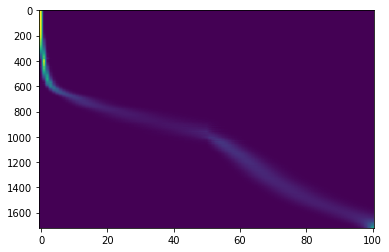

In [ ]:
plt.imshow(weight[ord,:],aspect="auto");

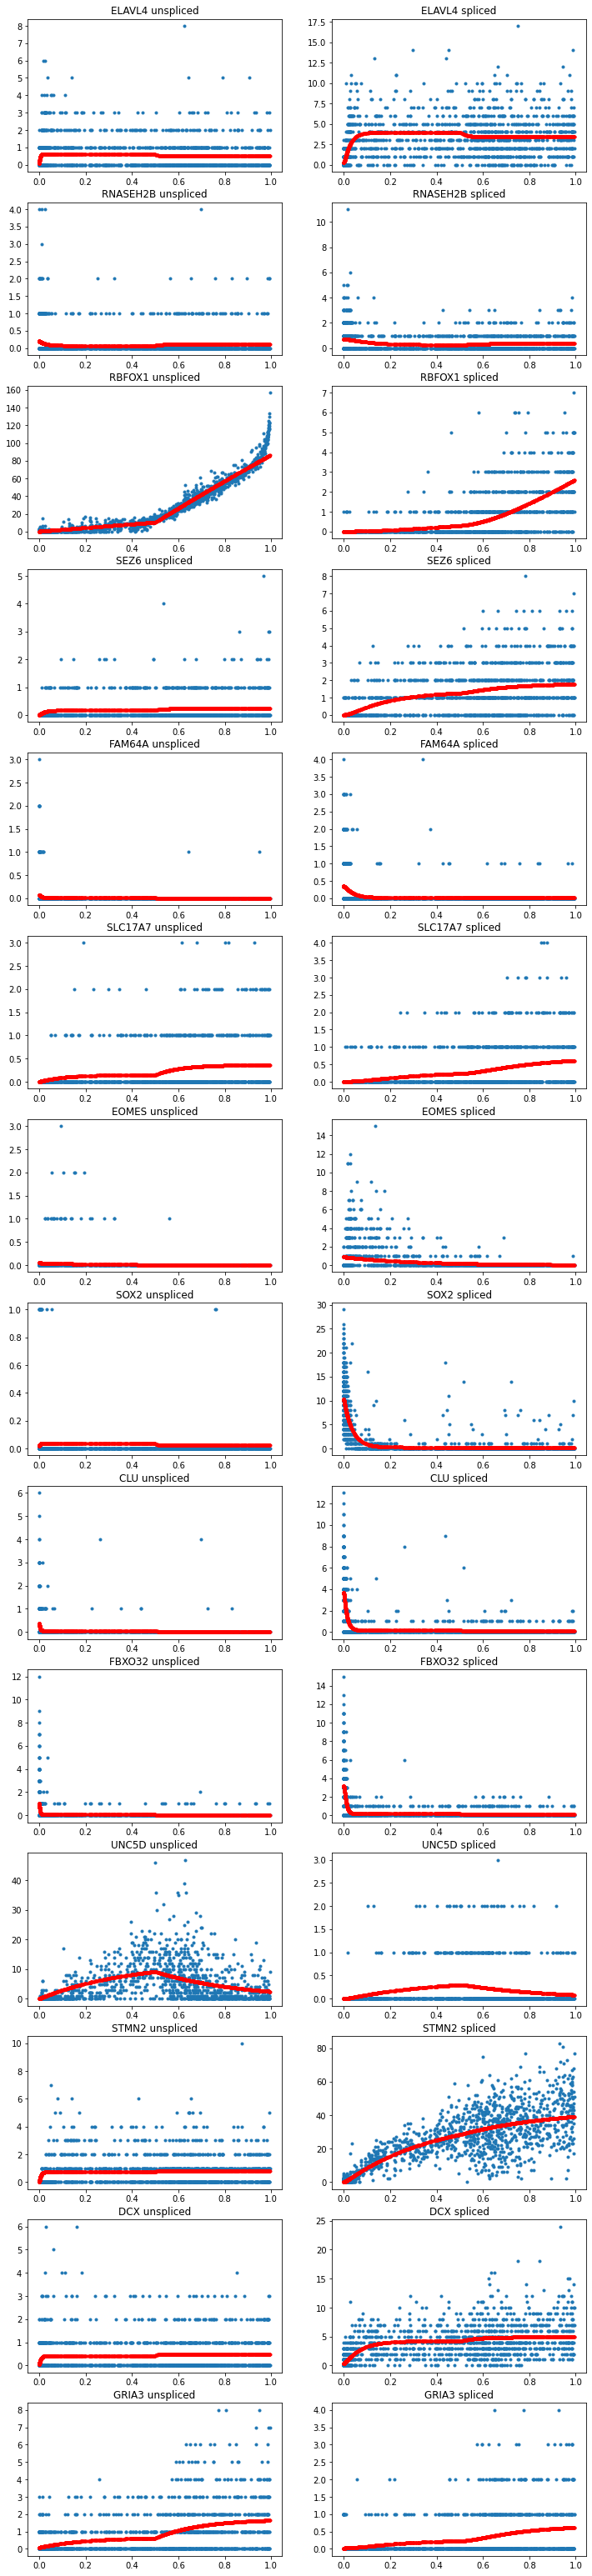

In [ ]:
y_hat = get_Y(theta_hat, pi, tau=(0,0.5,1))
fig, ax = plt.subplots(p,2,figsize=(12,4*p))
for i in range(p):
  ax[i,0].plot(pi,X[:,i,0],'.');
  ax[i,0].plot(pi,y_hat[:,i,0],'r.');
  ax[i,0].set_title(gene_list[i]+" unspliced")

  ax[i,1].plot(pi,X[:,i,1],'.');
  ax[i,1].plot(pi,y_hat[:,i,1],'r.');
  ax[i,1].set_title(gene_list[i]+" spliced")

In [ ]:
# Epoch
Epoch = 20
tau=(0,0.66,1)
K=len(tau)-1
n,p=np.shape(X)
theta = np.ones((p,K+2))
theta[:,0:(K+1)]=np.mean(X,axis=0)[:,None]
pi=np.random.permutation(n)/(n-1)
for k in range(Epoch):
  theta=infer_theta(X,pi,tau,theta)
  pi=infer_t(X,theta,tau,t0=pi,iters=n*20)
  #print(theta)

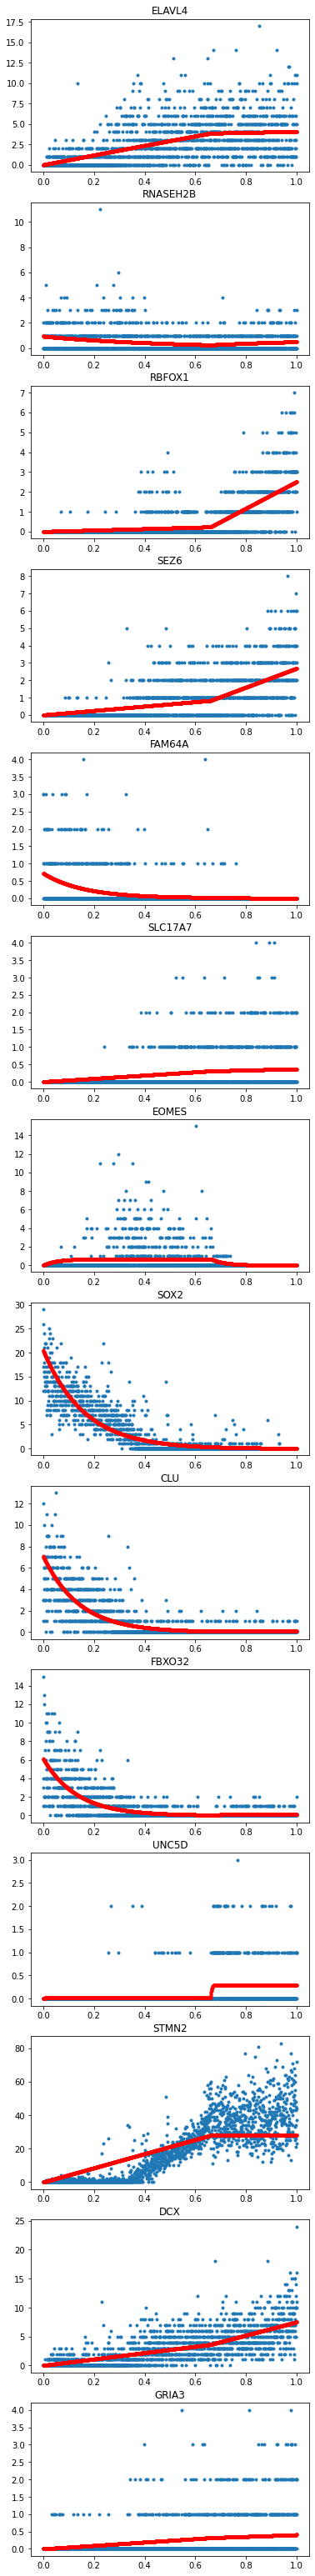

In [ ]:
y_hat = get_y(theta, pi, tau)
fig, ax = plt.subplots(p,1,figsize=(6,4*p))
for i in range(p):
  ax[i].plot(pi,X[:,i],'.');
  ax[i].plot(pi,y_hat[:,i],'r.');
  ax[i].set_title(gene_list[i])

#### Check cell size

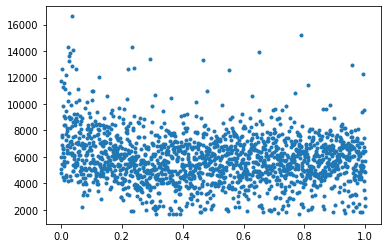

In [ ]:
plt.plot(pi,np.sum(adata.layers["spliced"],axis=1),'.');

### Two states

In [ ]:
theta_hat, weight = traj_EM(X,tau=(0,0.5,1),parallel=True,n_threads=2)

In [ ]:
t=np.linspace(0,1,101)
pi=np.sum(weight * t, axis=1)

In [ ]:
ord = np.argsort(pi)

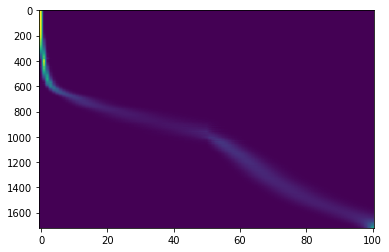

In [ ]:
plt.imshow(weight[ord,:],aspect="auto");

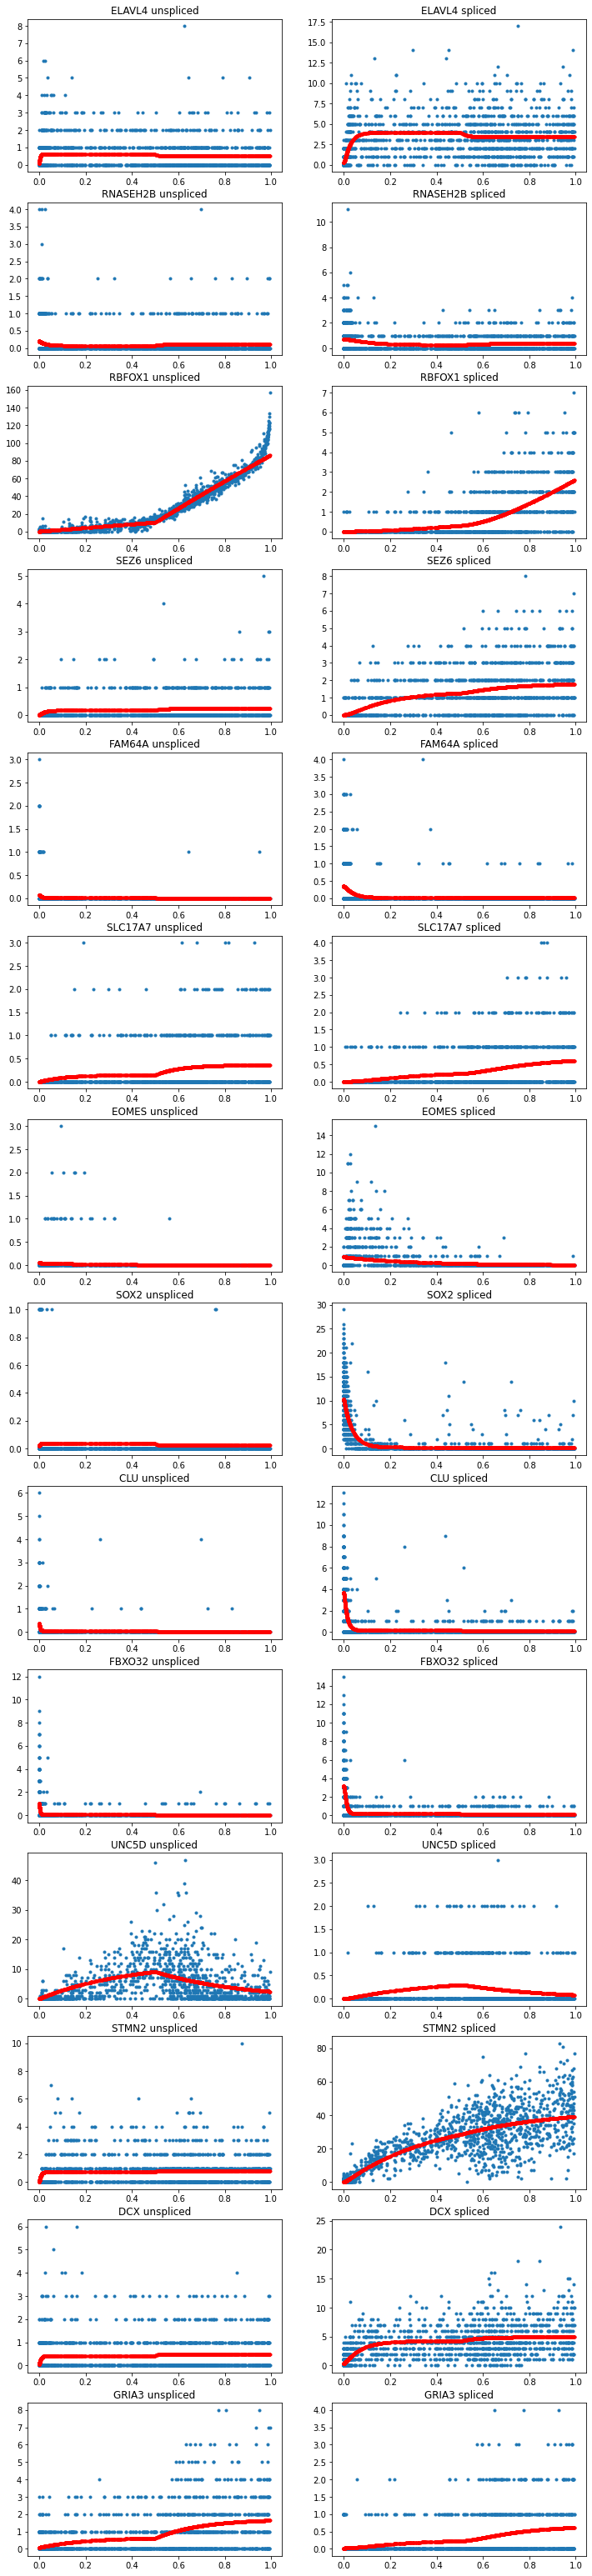

In [ ]:
y_hat = get_Y(theta_hat, pi, tau=(0,0.5,1))
fig, ax = plt.subplots(p,2,figsize=(12,4*p))
for i in range(p):
  ax[i,0].plot(pi,X[:,i,0],'.');
  ax[i,0].plot(pi,y_hat[:,i,0],'r.');
  ax[i,0].set_title(gene_list[i]+" unspliced")

  ax[i,1].plot(pi,X[:,i,1],'.');
  ax[i,1].plot(pi,y_hat[:,i,1],'r.');
  ax[i,1].set_title(gene_list[i]+" spliced")

In [ ]:
# Epoch
Epoch = 20
tau=(0,0.66,1)
K=len(tau)-1
n,p=np.shape(X)
theta = np.ones((p,K+2))
theta[:,0:(K+1)]=np.mean(X,axis=0)[:,None]
pi=np.random.permutation(n)/(n-1)
for k in range(Epoch):
  theta=infer_theta(X,pi,tau,theta)
  pi=infer_t(X,theta,tau,t0=pi,iters=n*20)
  #print(theta)

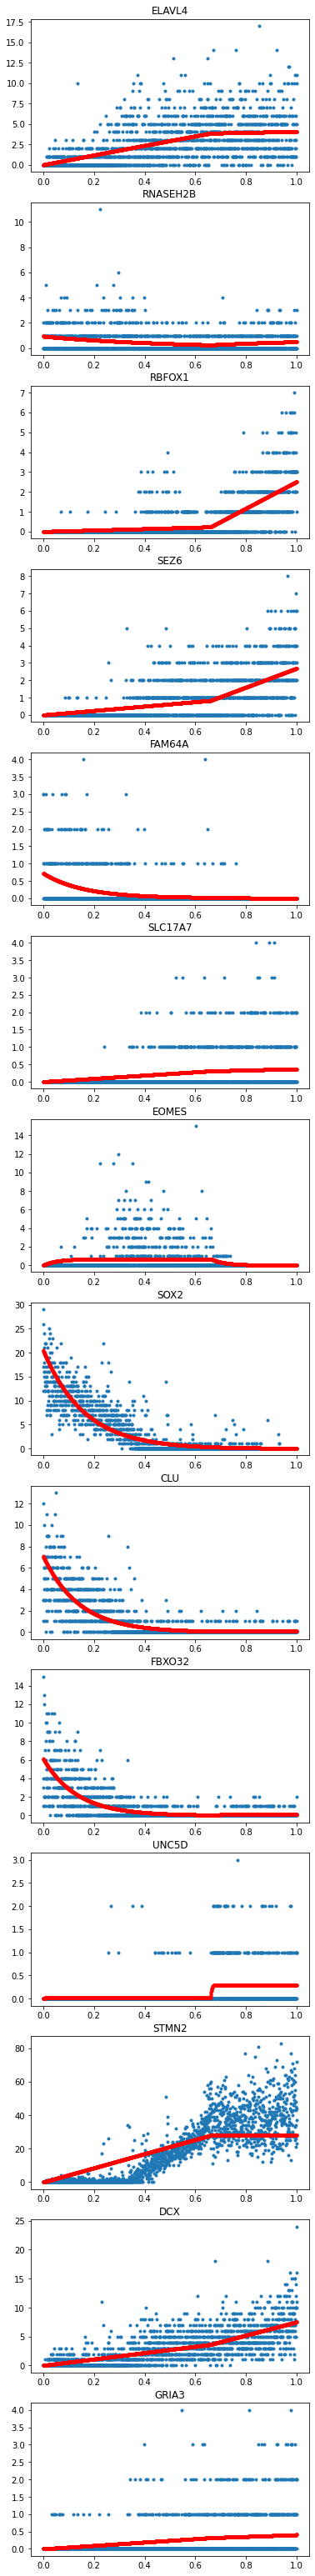

In [ ]:
y_hat = get_y(theta, pi, tau)
fig, ax = plt.subplots(p,1,figsize=(6,4*p))
for i in range(p):
  ax[i].plot(pi,X[:,i],'.');
  ax[i].plot(pi,y_hat[:,i],'r.');
  ax[i].set_title(gene_list[i])

#### Check cell size

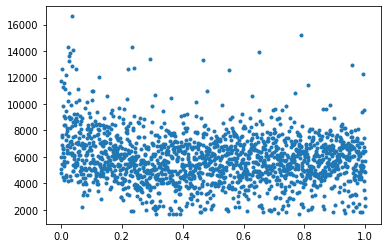

In [ ]:
plt.plot(pi,np.sum(adata.layers["spliced"],axis=1),'.');

### Three states

In [ ]:
theta_hat, weight = traj_EM(X,tau=(0,0.33,0.66,1),parallel=True,n_threads=2)

In [ ]:
t=np.linspace(0,1,101)
pi=np.sum(weight * t, axis=1)

In [ ]:
ord = np.argsort(pi)

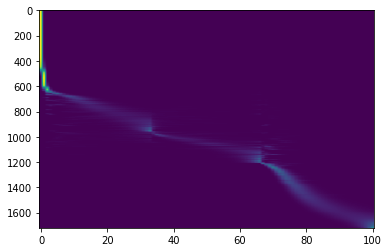

In [ ]:
plt.imshow(weight[ord,:],aspect="auto");

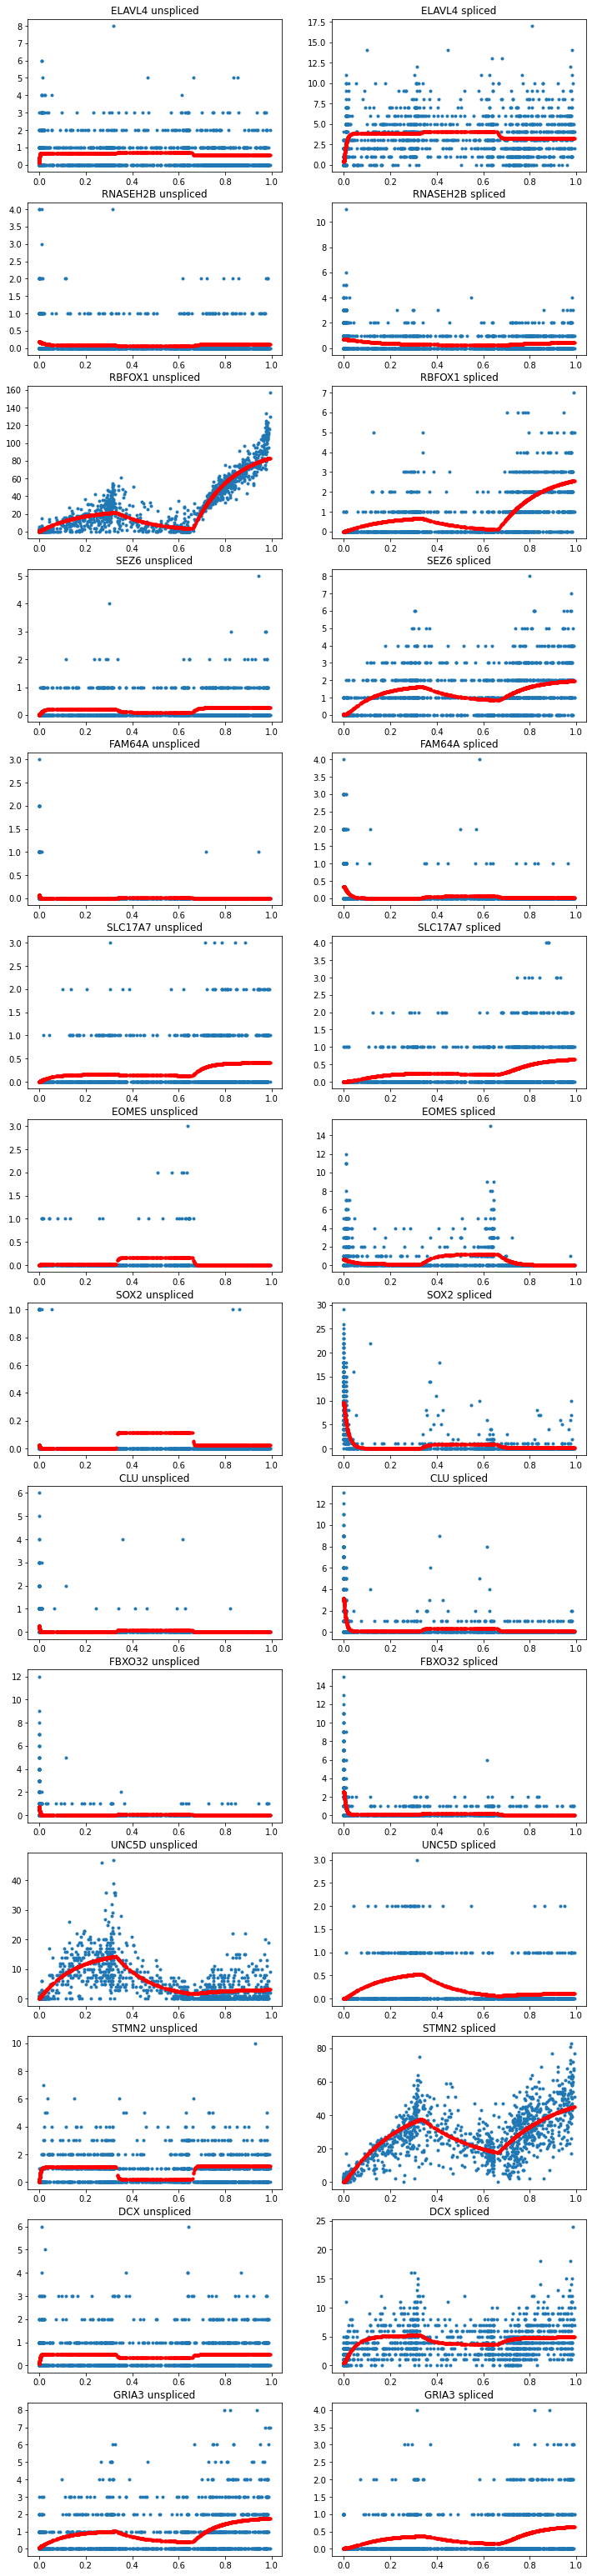

In [ ]:
y_hat = get_Y(theta_hat, pi, tau=(0,0.33,0.66,1))
fig, ax = plt.subplots(p,2,figsize=(12,4*p))
for i in range(p):
  ax[i,0].plot(pi,X[:,i,0],'.');
  ax[i,0].plot(pi,y_hat[:,i,0],'r.');
  ax[i,0].set_title(gene_list[i]+" unspliced")

  ax[i,1].plot(pi,X[:,i,1],'.');
  ax[i,1].plot(pi,y_hat[:,i,1],'r.');
  ax[i,1].set_title(gene_list[i]+" spliced")

#### Check cell size

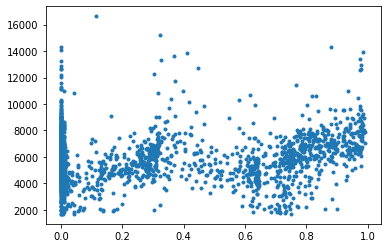

In [ ]:
plt.plot(pi,np.sum(adata.layers["spliced"],axis=1),'.');

## Inference with more genes

In [ ]:
genes=["SOX2","SLC17A7","EOMES","CLU","FBXO32",
       "UNC5D","SEZ6","RBFOX1","DCX","GRIA3",
       "STMN2", "FAM64A","ELAVL4","RNASEH2B"]
idx=adata.var_names.isin(genes)
gene_list=adata.var_names[idx]
X=adata.layers["spliced"][:,idx].toarray()

In [ ]:
# Epoch
Epoch = 20
K=3
tau=(0,0.3,0.7,1)
n,p=np.shape(X)
theta = np.ones((p,K+2))
theta[:,0:(K+1)]=np.mean(X,axis=0)[:,None]
pi=np.random.permutation(n)/(n-1)
for k in range(Epoch):
  theta=infer_theta(X,pi,tau,theta)
  pi=infer_t(X,theta,tau,t0=pi,iters=n*20)
  #print(theta)

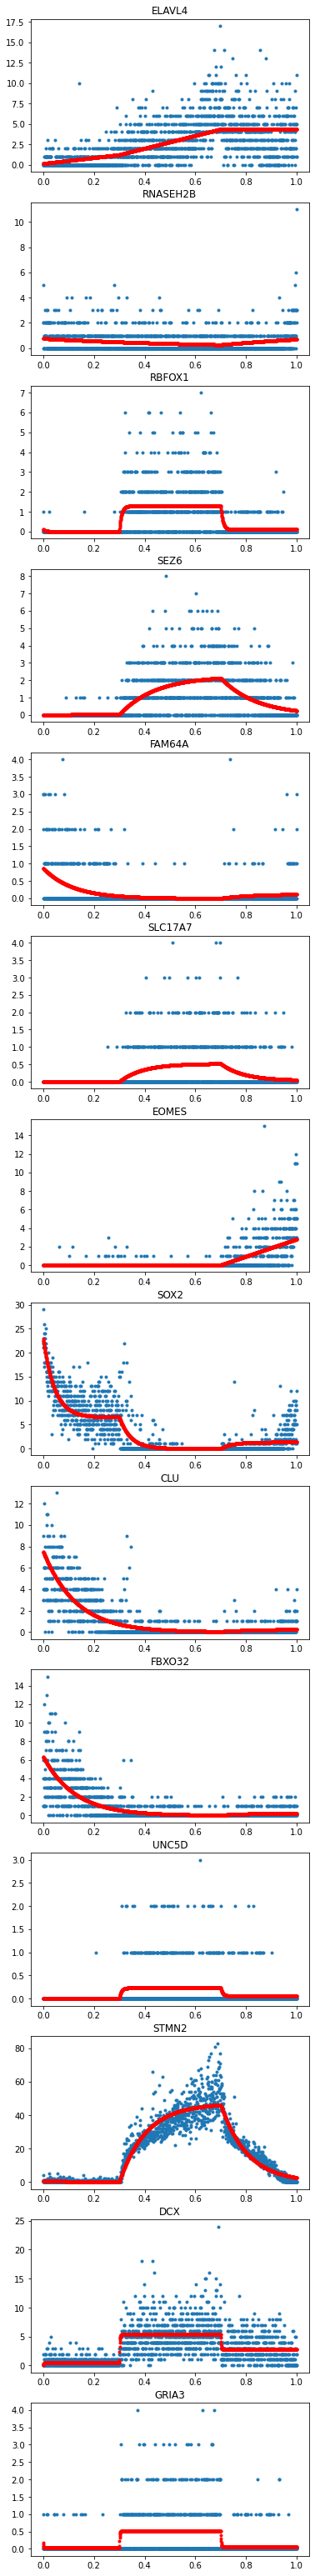

In [ ]:
y_hat = get_y(theta, pi, tau)
fig, ax = plt.subplots(p,1,figsize=(6,4*p))
for i in range(p):
  ax[i].plot(pi,X[:,i],'.');
  ax[i].plot(pi,y_hat[:,i],'r.');
  ax[i].set_title(gene_list[i])

### Check cell size

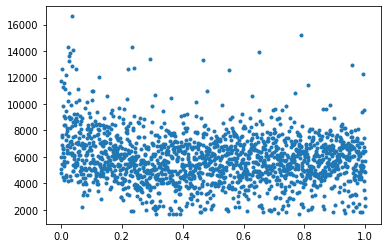

In [ ]:
plt.plot(pi,np.sum(adata.layers["spliced"],axis=1),'.');